GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Count images: 6774
Count labels: 6774
Calculated Class Weights: {0: 0.7442320369149638, 1: 1.52361673414305}
Loading EfficientNetB0 base model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
EfficientNetB0 loaded.
EfficientNetB0 layers: 238. Base model trainable: True


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap (GlobalAveragePooling2D)         │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 4,171,645 (15.91 MB)

 Non-trainable params: 42,023 (164.16 KB)

Compiling model...
Model compiled.
Starting training...
Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 149s 431ms/step - accuracy: 0.0000e+00 - loss: 0.4521 - val_accuracy: 0.6696 - val_loss: 0.6467 - learning_rate: 1.0000e-05
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.0000e+00 - loss: -0.2236 - val_accuracy: 0.6785 - val_loss: 0.6353 - learning_rate: 1.0000e-05
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.0000e+00 - loss: -1.8580 - val_accuracy: 0.7355 - val_loss: 0.8700 - learning_rate: 1.0000e-05
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.0000e+00 - loss: -6.9019 - val_accuracy: 0.8112 - val_loss: 2.3663 - learning_rate: 1.0000e-05
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.0000e+00 - loss: -14.6282 - val_accuracy: 0.3363 - val_loss: 2.2893 - learning_rate: 1.0000e-05
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.0000e+00 - loss: -23.4858 - val_accuracy: 0.3284

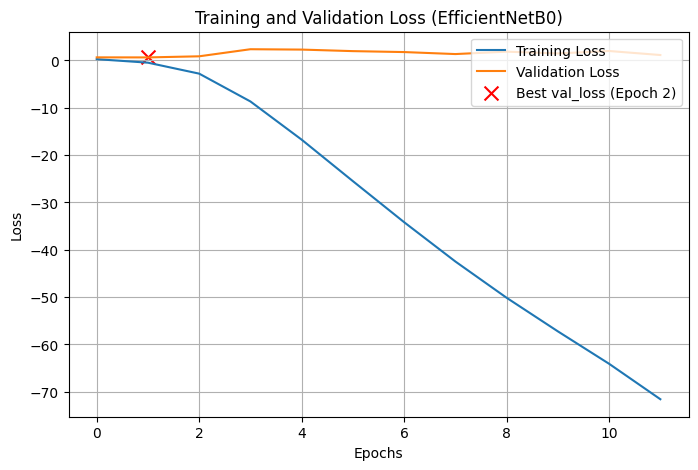

Evaluating on validation set...
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step
Predictions count: 1017, True labels count: 1017
Calculating Precision, Recall, F1, and Thresholds...

Best F1-score Threshold: 0.2984
  - F1-score: 0.4944
  - Precision at this threshold: 0.3278
  - Recall at this threshold: 0.9970

Suggested Threshold for Recall >= 0.88: 0.2984
  - Precision at this threshold: 0.3278
  - Actual Recall at this threshold: 0.9970
  - F1-score at this threshold: 0.4944
Chosen threshold for evaluation: 0.2984


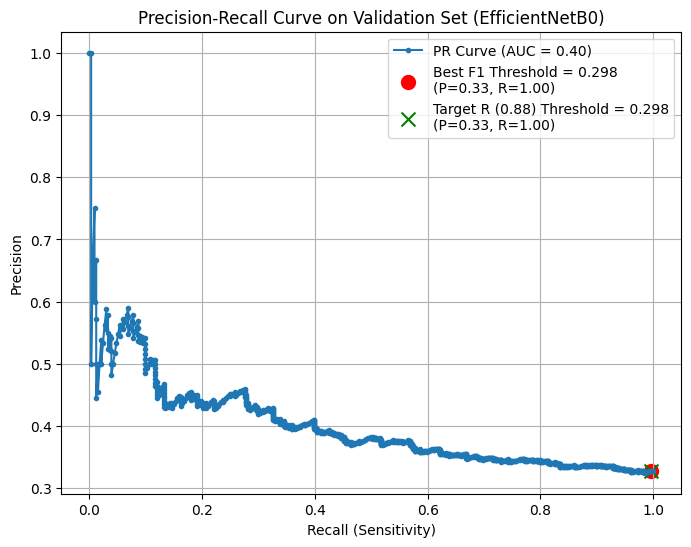


Classification Report (Validation - Adjusted Threshold):
               precision    recall  f1-score   support

No Stroke (0)       0.00      0.00      0.00       683
   Stroke (1)       0.33      1.00      0.49       334

     accuracy                           0.33      1017
    macro avg       0.16      0.50      0.25      1017
 weighted avg       0.11      0.33      0.16      1017



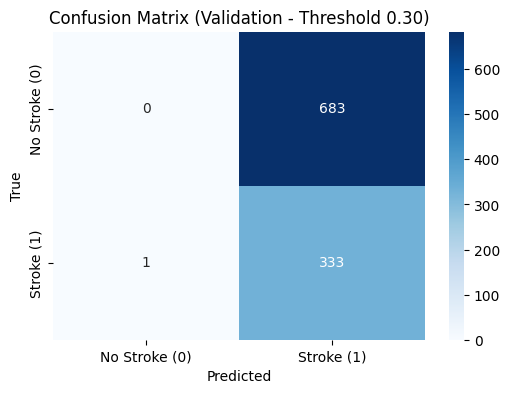

Loading test data...
Found 200 samples in test_data with valid labels.
Predicting on test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 778ms/step
Test Predictions count: 200, True labels count: 200
Applying threshold: 0.2984

Classification Report on Test Set:

Confusion Matrix on Test Set:
[[  0 130]
 [  0  70]]


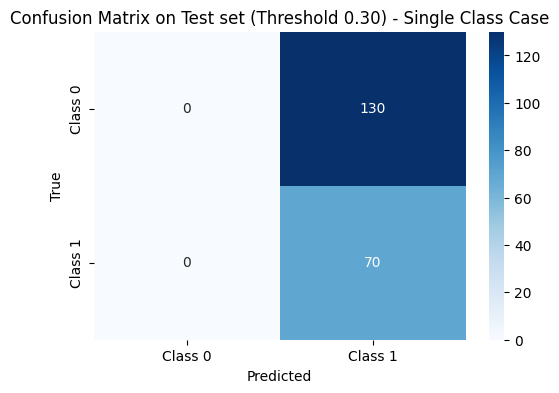


--- Script Finished ---


In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc, f1_score, classification_report, confusion_matrix

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU:", gpus)
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    print("Cant find GPU, use CPU.")

data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ'
hermorrhage_png = glob.glob(os.path.join(data_dir, 'Kanama/PNG/*.png'))
ischemia_png = glob.glob(os.path.join(data_dir, 'İskemi/PNG/*.png'))
no_stroke_png = glob.glob(os.path.join(data_dir, 'İnme Yok/*.png'))

images = []
labels = []

for img_path in hermorrhage_png:
    images.append(img_path)
    labels.append(1)

for img_path in ischemia_png:
    images.append(img_path)
    labels.append(1)

for img_path in no_stroke_png:
    images.append(img_path)
    labels.append(0)

print(f"Count images: {len(images)}")
print(f"Count labels: {len(labels)}")

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 1
EPOCHS = 100

data_df = pd.DataFrame({
    'filename': images,
    'class': labels
})
data_df['class'] = data_df['class'].astype(str)

train_df, val_df = train_test_split(
    data_df,
    test_size=0.15,
    stratify=data_df['class'],
    random_state=42
)

def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE[0], IMG_SIZE[1]])
    return image

def configure_for_performance(ds, batch_size):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

def create_dataset_val_test(df, batch_size):
    list_ds = tf.data.Dataset.from_tensor_slices((df['filename'].values, df['class'].astype(int).values))
    ds = list_ds.map(lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)),
                     num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.cache()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

class_weights_calc = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights_calc))
print("Calculated Class Weights:", class_weight_dict)

def get_sample_weights(labels, class_weight_mapping):
    weights = np.array([class_weight_mapping[int(label)] for label in labels])
    return weights

sample_weights_train = get_sample_weights(train_df['class'].astype(int).values,
                                          class_weight_dict).astype(np.float32)

train_images_labels_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['filename'].values, train_df['class'].astype(int).values)
)
train_images_labels_ds = train_images_labels_ds.map(
    lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)),
    num_parallel_calls=tf.data.AUTOTUNE
)

train_weights_ds = tf.data.Dataset.from_tensor_slices(sample_weights_train)
train_ds_combined = tf.data.Dataset.zip((train_images_labels_ds, train_weights_ds))
train_ds_with_weights_final = configure_for_performance(train_ds_combined, BATCH_SIZE)
val_ds = create_dataset_val_test(val_df, BATCH_SIZE)

print("Loading EfficientNetB0 base model...")
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
print("EfficientNetB0 loaded.")

base_model.trainable = True
print(f"EfficientNetB0 layers: {len(base_model.layers)}. Base model trainable: {base_model.trainable}")

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(name="gap"),
    layers.Dense(128, activation='relu', name="dense_1"),
    layers.Dropout(0.3, name="dropout"),
    layers.Dense(NUM_CLASSES, activation='sigmoid', name="output")
])

model.summary()

print("Compiling model...")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Model compiled.")

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,
    patience=5,
    verbose=1,
    min_lr=1e-7
)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
    min_delta=0
)

callbacks_list = [lr_scheduler, early_stopper]

print("Starting training...")
history = model.fit(
    train_ds_with_weights_final,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=callbacks_list
)
print("Training finished.")

model_save_path = '/kaggle/working/efficientnetb0_stroke_classifier.keras'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
actual_epochs = len(loss)
epochs_range = range(actual_epochs)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
best_epoch = np.argmin(val_loss)
plt.scatter(best_epoch, val_loss[best_epoch], s=100, c='red', marker='x', label=f'Best val_loss (Epoch {best_epoch+1})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (EfficientNetB0)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("Evaluating on validation set...")
val_ds_for_predict = create_dataset_val_test(val_df, BATCH_SIZE)
y_pred_proba_val = model.predict(val_ds_for_predict)
y_true_val = val_df['class'].astype(int).values

print(f"Predictions count: {len(y_pred_proba_val)}, True labels count: {len(y_true_val)}")
if len(y_pred_proba_val) != len(y_true_val):
     print(f"Warning: Predictions count ({len(y_pred_proba_val)}) does not match true labels count ({len(y_true_val)}). Adjusting true labels.")
     y_true_val = y_true_val[:len(y_pred_proba_val)]

print("Calculating Precision, Recall, F1, and Thresholds...")
precision, recall, thresholds = precision_recall_curve(y_true_val, y_pred_proba_val)
f1_scores = np.array([
    2 * (p * r) / (p + r) if (p + r) > 0 else 0
    for p, r in zip(precision[:-1], recall[:-1])
])

valid_thresholds = thresholds[:len(f1_scores)]

best_f1_idx = np.argmax(f1_scores)
best_threshold_f1 = valid_thresholds[best_f1_idx]
best_f1 = f1_scores[best_f1_idx]
best_precision_f1 = precision[best_f1_idx + 1]
best_recall_f1 = recall[best_f1_idx + 1]

print(f"\nBest F1-score Threshold: {best_threshold_f1:.4f}")
print(f"  - F1-score: {best_f1:.4f}")
print(f"  - Precision at this threshold: {best_precision_f1:.4f}")
print(f"  - Recall at this threshold: {best_recall_f1:.4f}")

target_recall = 0.88
recall_indices = np.where(recall[:-1] >= target_recall)[0]
best_threshold_recall = best_threshold_f1

if len(recall_indices) > 0:
    best_f1_for_recall_local_idx = np.argmax(f1_scores[recall_indices])
    best_threshold_recall_idx_global = recall_indices[best_f1_for_recall_local_idx]

    best_threshold_recall = valid_thresholds[best_threshold_recall_idx_global]
    best_precision_recall = precision[best_threshold_recall_idx_global + 1]
    actual_recall_recall = recall[best_threshold_recall_idx_global + 1]
    f1_recall = f1_scores[best_threshold_recall_idx_global]

    print(f"\nSuggested Threshold for Recall >= {target_recall}: {best_threshold_recall:.4f}")
    print(f"  - Precision at this threshold: {best_precision_recall:.4f}")
    print(f"  - Actual Recall at this threshold: {actual_recall_recall:.4f}")
    print(f"  - F1-score at this threshold: {f1_recall:.4f}")
else:
    print(f"\nNo threshold found for Recall >= {target_recall}. Using best F1 threshold.")

chosen_threshold = best_threshold_recall
print(f"Chosen threshold for evaluation: {chosen_threshold:.4f}")

pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.scatter(recall[best_f1_idx + 1], precision[best_f1_idx + 1], marker='o', s=100, color='red', label=f'Best F1 Threshold = {best_threshold_f1:.3f}\n(P={best_precision_f1:.2f}, R={best_recall_f1:.2f})')

if len(recall_indices) > 0:
     plt.scatter(actual_recall_recall, best_precision_recall, marker='x', color='green', s=100, label=f'Target R ({target_recall}) Threshold = {best_threshold_recall:.3f}\n(P={best_precision_recall:.2f}, R={actual_recall_recall:.2f})')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation Set (EfficientNetB0)')
plt.legend()
plt.grid(True)
plt.show()

y_pred_val_adjusted = (y_pred_proba_val.flatten() > chosen_threshold).astype(int)
print("\nClassification Report (Validation - Adjusted Threshold):")
print(classification_report(y_true_val, y_pred_val_adjusted, target_names=['No Stroke (0)', 'Stroke (1)']))

cm_val_adjusted = confusion_matrix(y_true_val, y_pred_val_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.title(f'Confusion Matrix (Validation - Threshold {chosen_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Loading test data...")
test_data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/PNG/'
png_files = glob.glob(os.path.join(test_data_dir, '*.png'))
png_filenames = [os.path.basename(f) for f in png_files]

cevaplar_path = os.path.join('/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/ASAMA1_Cevaplar.txt')
labels_dict = {}

try:
    with open(cevaplar_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()[1:]
        for line in lines:
            parts = [part.strip() for part in line.strip().split('\t')]
            if len(parts) == 2 and parts[0] and parts[1]:
                image_id, label = parts
                filename = f"{image_id}.png"
                if label in ['0', '1']:
                     labels_dict[filename] = int(label)
                else:
                     print(f"Warning: Invalid label '{label}' for image ID {image_id} in answer file. Skipping.")

except FileNotFoundError:
    print(f"Error: Answer file not found at {cevaplar_path}")
    exit()
except Exception as e:
    print(f"Error reading answer file: {e}")
    exit()

test_images = []
test_labels = []

for png_file in png_files:
    filename = os.path.basename(png_file)
    if filename in labels_dict:
        test_images.append(png_file)
        test_labels.append(labels_dict[filename])

if not test_images:
     print("Error: No matching test images found based on the answer key.")
     exit()

test_data = pd.DataFrame({
    'filename': test_images,
    'class': test_labels
})

print(f"Found {len(test_data)} samples in test_data with valid labels.")

test_ds = create_dataset_val_test(test_data, BATCH_SIZE)

print("Predicting on test set...")
y_pred_proba_test = model.predict(test_ds)
y_true_test = test_data['class'].values

print(f"Test Predictions count: {len(y_pred_proba_test)}, True labels count: {len(y_true_test)}")

if len(y_pred_proba_test) != len(y_true_test):
     print(f"Warning: Test Predictions count ({len(y_pred_proba_test)}) does not match true labels count ({len(y_true_test)}). Adjusting true labels.")
     y_true_test = y_true_test[:len(y_pred_proba_test)]

print(f"Applying threshold: {chosen_threshold:.4f}")
y_pred_test = (y_pred_proba_test.flatten() > chosen_threshold).astype(int)

print("\nClassification Report on Test Set:")
if len(np.unique(y_true_test)) < 2 or len(np.unique(y_pred_test)) < 2:
    print("Warning: Only one class present in test true labels or predictions. Reporting confusion matrix only.")
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    print("\nConfusion Matrix on Test Set:")
    unique_labels = np.unique(np.concatenate((y_true_test, y_pred_test)))
    print(cm_test)
    try:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Class {l}' for l in unique_labels],
                    yticklabels=[f'Class {l}' for l in unique_labels])
        plt.title(f'Confusion Matrix on Test set (Threshold {chosen_threshold:.2f}) - Single Class Case')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    except Exception as plot_err:
        print(f"Could not plot confusion matrix: {plot_err}")
else:
    print(classification_report(y_true_test, y_pred_test, target_names=['No Stroke (0)', 'Stroke (1)']))
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke (0)', 'Stroke (1)'],
                yticklabels=['No Stroke (0)', 'Stroke (1)'])
    plt.title(f'Confusion Matrix on Test set (Threshold {chosen_threshold:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

print("\n--- Script Finished ---")

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth enabled for GPUs.
Count images: 6774
Count labels: 6774
Label distribution: [4551 2223]
Training samples: 5757, Validation samples: 1017
Training label distribution:
 class
0    0.671878
1    0.328122
Name: proportion, dtype: float64
Validation label distribution:
 class
0    0.671583
1    0.328417
Name: proportion, dtype: float64
Using Class Weights: {0: 0.7442320369149638, 1: 1.52361673414305}
Train dataset element spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))
Validation dataset element spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))
Loading EfficientNetV2B0 base model...
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
EfficientNetV2B0 loaded.
EfficientNetV2B0 layers: 270. Base model trainable: True


Model: "StrokeClassifier_EfficientNetV2B0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gap (GlobalAveragePooling2D)         │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ head_dropout (Dropout)               │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,083,409 (23.21 MB)

 Trainable params: 6,022,801 (22.98 MB)

 Non-trainable params: 60,608 (236.75 KB)

Compiling model...
Model compiled.
Starting training with class_weight argument...
Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 144s 382ms/step - accuracy: 0.5104 - loss: 0.6902 - val_accuracy: 0.6686 - val_loss: 0.6273 - learning_rate: 1.0000e-05
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.6914 - loss: 0.5965 - val_accuracy: 0.7463 - val_loss: 0.5326 - learning_rate: 1.0000e-05
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.7765 - loss: 0.5069 - val_accuracy: 0.8309 - val_loss: 0.4240 - learning_rate: 1.0000e-05
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.8407 - loss: 0.4091 - val_accuracy: 0.8741 - val_loss: 0.3328 - learning_rate: 1.0000e-05
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.8836 - loss: 0.3211 - val_accuracy: 0.9036 - val_loss: 0.2669 - learning_rate: 1.0000e-05
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - accuracy: 0.8998 - loss: 0.2761 - val_accuracy: 0.9125 - val_lo

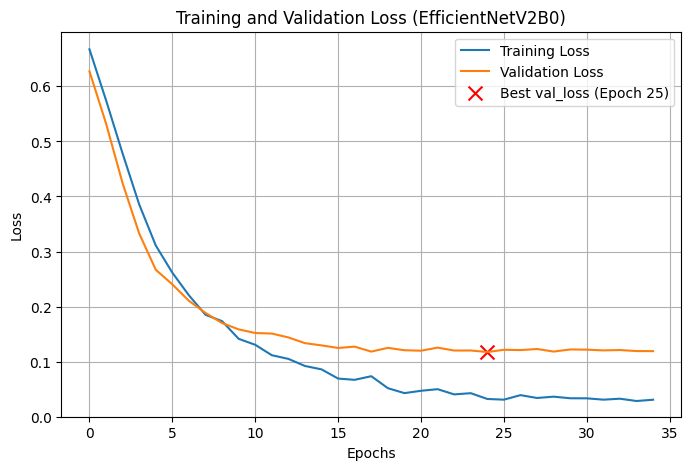

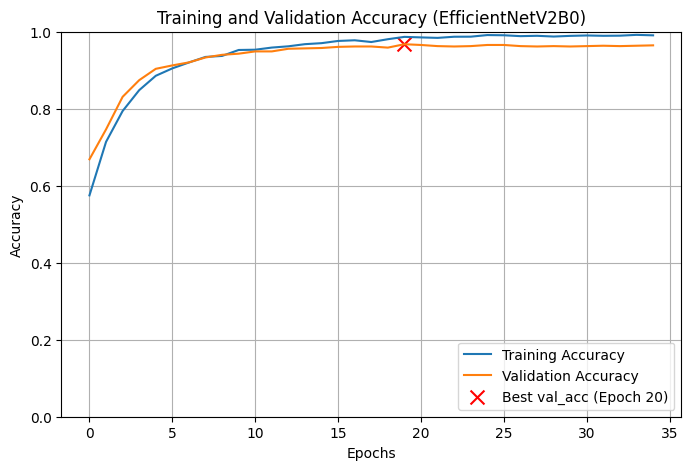


Evaluating on validation set for threshold selection...
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step
Validation Predictions count: 1017, True labels count: 1017
Calculating Precision, Recall, F1, and Thresholds...

Best F1-score Threshold: 0.4919
  - F1-score: 0.9488
  - Precision at this threshold: 0.9544
  - Recall at this threshold: 0.9401

Suggested Threshold for Recall >= 0.88: 0.4919
  - Precision at this threshold: 0.9544
  - Actual Recall at this threshold: 0.9401
  - F1-score at this threshold: 0.9488

Chosen threshold for evaluation: 0.4919


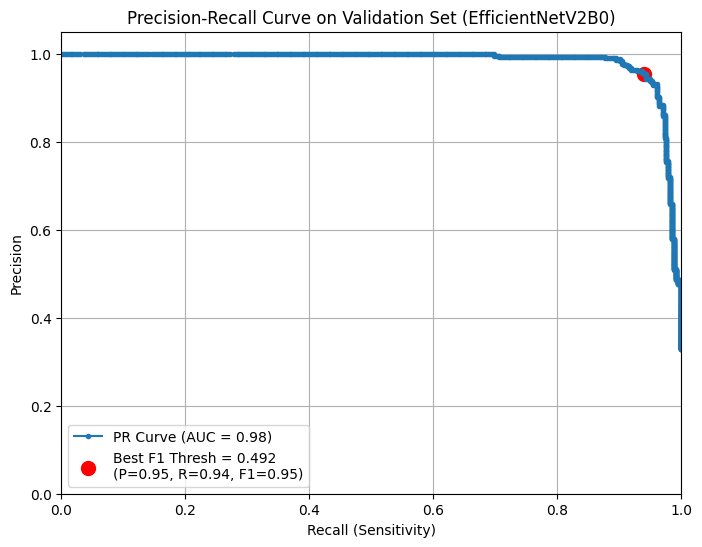


Classification Report (Validation - Adjusted Threshold):
               precision    recall  f1-score   support

No Stroke (0)       0.97      0.98      0.97       683
   Stroke (1)       0.95      0.94      0.95       334

     accuracy                           0.97      1017
    macro avg       0.96      0.96      0.96      1017
 weighted avg       0.97      0.97      0.97      1017



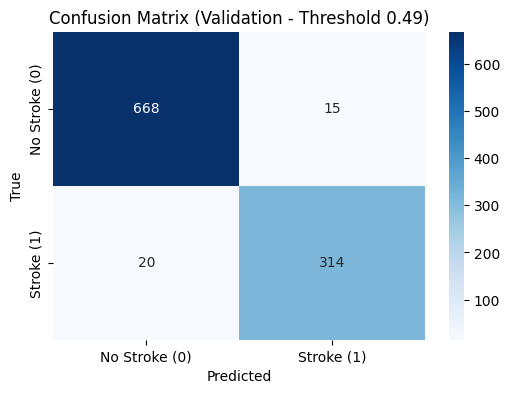


--- Test Set Evaluation ---
Loading test data...
Found 200 samples in test_data with valid labels.
Test label distribution:
 class
0    0.65
1    0.35
Name: proportion, dtype: float64
Predicting on test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step
Test Predictions count: 200, True labels count: 200
Applying threshold: 0.4919

Classification Report on Test Set:
               precision    recall  f1-score   support

No Stroke (0)       0.93      0.98      0.95       130
   Stroke (1)       0.95      0.87      0.91        70

     accuracy                           0.94       200
    macro avg       0.94      0.92      0.93       200
 weighted avg       0.94      0.94      0.94       200



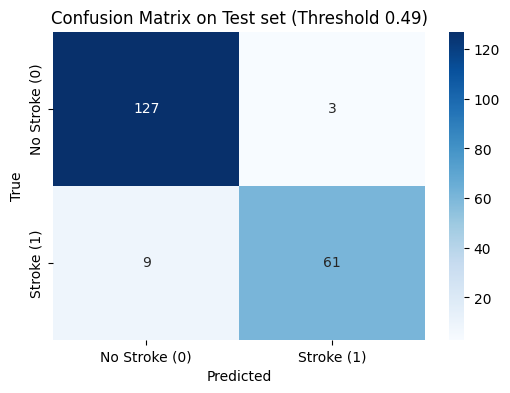


--- Script Finished ---


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# Import the specific EfficientNetV2 model you want to use
from tensorflow.keras.applications import EfficientNetV2B0
# Import its specific preprocessing function
# from tensorflow.keras.applications.efficientnet_v2 import preprocess_input # We'll use the full path later
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    f1_score,
    classification_report,
    confusion_matrix)

# --- GPU Check ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU:", gpus)
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for GPUs.")
    except RuntimeError as e:
        print(f"RuntimeError configuring GPUs: {e}")
else:
    print("Cant find GPU, use CPU.")

# --- Data Loading ---
data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ'
# Consider adding error handling if paths don't exist
try:
    hermorrhage_png = glob.glob(os.path.join(data_dir, 'Kanama/PNG/*.png'))
    ischemia_png = glob.glob(os.path.join(data_dir, 'İskemi/PNG/*.png'))
    no_stroke_png = glob.glob(os.path.join(data_dir, 'İnme Yok/*.png'))

    if not hermorrhage_png and not ischemia_png and not no_stroke_png:
        print(f"Warning: No PNG files found in the specified subdirectories of {data_dir}")
        # Decide how to proceed - exit or continue if some data might exist elsewhere?
        # exit() # Or handle appropriately

except FileNotFoundError:
    print(f"Error: Data directory not found at {data_dir}")
    exit()


images = []
labels = [] # Use integers: 0 for No Stroke, 1 for Stroke

# Label 1 for stroke (combining Hemorrhage and Ischemia)
for img_path in hermorrhage_png:
    images.append(img_path)
    labels.append(1)

for img_path in ischemia_png:
    images.append(img_path)
    labels.append(1)

# Label 0 for no stroke
for img_path in no_stroke_png:
    images.append(img_path)
    labels.append(0)

if not images:
     print("Error: No images were loaded. Check data paths and file types.")
     exit()

print(f"Count images: {len(images)}")
print(f"Count labels: {len(labels)}")
print(f"Label distribution: {np.bincount(labels)}")


# --- Constants ---
# EfficientNetV2B0 default input size is 224x224
IMG_SIZE = (224, 224)
BATCH_SIZE = 32 # Adjust based on GPU memory
NUM_CLASSES = 1 # Binary classification
EPOCHS = 100 # Early stopping will likely trigger before this

# --- DataFrame and Splitting ---
data_df = pd.DataFrame({
    'filename': images,
    'class': labels # Keep labels as integers
})
# data_df['class'] = data_df['class'].astype(str) # Stratify works with integers too

train_df, val_df = train_test_split(
    data_df,
    test_size=0.15,
    stratify=data_df['class'], # Stratify based on integer labels
    random_state=42
)

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")
print("Training label distribution:\n", train_df['class'].value_counts(normalize=True))
print("Validation label distribution:\n", val_df['class'].value_counts(normalize=True))


# --- tf.data Pipeline ---

# MODIFIED: Use EfficientNetV2 preprocessing
def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE[0], IMG_SIZE[1]])
    image = tf.cast(image, tf.float32) # Cast to float32 (values 0-255)
    # Apply EfficientNetV2 specific preprocessing
    image = tf.keras.applications.efficientnet_v2.preprocess_input(image)
    return image

def configure_for_performance(ds, batch_size):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000) # Shuffle before batching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE) # Prefetch batches
    return ds

# Dataset function for training (yields image, label)
def create_dataset_train(df, batch_size):
    # Use integer labels directly from DataFrame
    list_ds = tf.data.Dataset.from_tensor_slices((df['filename'].values, df['class'].values))

    ds = list_ds.map(lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)), # Label needs to be float for binary_crossentropy
                     num_parallel_calls=tf.data.AUTOTUNE)

    # Configure performance (cache, shuffle, batch, prefetch)
    ds = configure_for_performance(ds, batch_size)
    return ds

# Dataset function for validation/test (yields image, label) - No shuffling needed usually
def create_dataset_val_test(df, batch_size):
    # Use integer labels directly from DataFrame
    list_ds = tf.data.Dataset.from_tensor_slices((df['filename'].values, df['class'].values))

    ds = list_ds.map(lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)),
                     num_parallel_calls=tf.data.AUTOTUNE)

    # Configure performance (cache, batch, prefetch - NO shuffle)
    ds = ds.cache()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds


# --- Class Weights ---
# Calculate class weights using the original integer labels list
class_weights_calc = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(labels), # Should be [0, 1]
    y=labels
)
class_weight_dict = dict(enumerate(class_weights_calc))
print("Using Class Weights:", class_weight_dict)

# --- Create Datasets ---
# FIX: Use the function that yields only (image, label) for training
train_ds = create_dataset_train(train_df, BATCH_SIZE)
val_ds = create_dataset_val_test(val_df, BATCH_SIZE)

# Optional: Verify dataset structure
print("Train dataset element spec:", train_ds.element_spec)
print("Validation dataset element spec:", val_ds.element_spec)


# --- Model Definition (Using EfficientNetV2B0) ---
print("Loading EfficientNetV2B0 base model...")
try:
    # Ensure internet is enabled if running on Kaggle/Colab
    base_model = EfficientNetV2B0(weights='imagenet',
                                  include_top=False,
                                  input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    print("EfficientNetV2B0 loaded.")
except Exception as e:
     print(f"Error loading base model: {e}")
     print("Ensure internet is enabled and TensorFlow version is compatible.")
     exit()


# Fine-tuning strategy: Start with the base model trainable
base_model.trainable = True
print(f"EfficientNetV2B0 layers: {len(base_model.layers)}. Base model trainable: {base_model.trainable}")
# Optional: Freeze parts of the model if needed
# num_layers_to_freeze = 100 # Example
# print(f"Freezing first {num_layers_to_freeze} layers of the base model.")
# for layer in base_model.layers[:num_layers_to_freeze]:
#     layer.trainable = False

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(name="gap"),
    layers.Dropout(0.3, name="head_dropout"), # Dropout before final dense layers
    layers.Dense(128, activation='relu', name="dense_1"),
    # layers.Dropout(0.3, name="final_dropout"), # Optional dropout after dense
    layers.Dense(NUM_CLASSES, activation='sigmoid', name="output") # Sigmoid for binary
], name="StrokeClassifier_EfficientNetV2B0")

model.summary()

# --- Compile Model ---
print("Compiling model...")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # Start with a low LR for fine-tuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Model compiled.")

# --- Callbacks ---
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Reduce LR more aggressively if plateauing
    patience=4, # Slightly shorter patience for LR reduction
    verbose=1,
    min_lr=1e-7
)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=10, # Stop after 10 epochs of no improvement in val_loss
    verbose=1,
    restore_best_weights=True, # Restore weights from the best epoch
    min_delta=0.0001 # Minimum change to qualify as an improvement
)

callbacks_list = [lr_scheduler, early_stopper]

# --- Training ---
print("Starting training with class_weight argument...")
history = model.fit(
    train_ds, # Dataset yields only (image, label)
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=callbacks_list,
    class_weight=class_weight_dict # Pass weights here
)
print("Training finished.")

# --- Save Model ---
model_save_path = '/kaggle/working/efficientnetv2b0_stroke_classifier.keras' # Updated name
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# --- Evaluation and Plotting ---

# Plot Loss
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
actual_epochs = len(loss)
epochs_range = range(actual_epochs)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
best_epoch_idx = np.argmin(val_loss)
plt.scatter(best_epoch_idx, val_loss[best_epoch_idx], s=100, c='red', marker='x', label=f'Best val_loss (Epoch {best_epoch_idx+1})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (EfficientNetV2B0)') # Updated title
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(bottom=0) # Loss should not be negative
plt.show()

# Plot Accuracy
if 'accuracy' in history_dict and 'val_accuracy' in history_dict:
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    best_acc_epoch_idx = np.argmax(val_acc)
    plt.scatter(best_acc_epoch_idx, val_acc[best_acc_epoch_idx], s=100, c='red', marker='x', label=f'Best val_acc (Epoch {best_acc_epoch_idx+1})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy (EfficientNetV2B0)') # Updated title
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.ylim([0, 1])
    plt.show()


# --- Threshold Calculation on Validation Set ---
print("\nEvaluating on validation set for threshold selection...")
# Ensure val_ds is reset if needed, or recreate it
val_ds_for_predict = create_dataset_val_test(val_df, BATCH_SIZE)
y_pred_proba_val = model.predict(val_ds_for_predict)
y_true_val = val_df['class'].values # Get original integer labels

print(f"Validation Predictions count: {len(y_pred_proba_val)}, True labels count: {len(y_true_val)}")
# Adjust if batching drops remainder
if len(y_pred_proba_val) != len(y_true_val):
     print(f"Warning: Predictions count ({len(y_pred_proba_val)}) does not match true labels count ({len(y_true_val)}). Adjusting true labels.")
     y_true_val = y_true_val[:len(y_pred_proba_val)]

print("Calculating Precision, Recall, F1, and Thresholds...")
precision, recall, thresholds = precision_recall_curve(y_true_val, y_pred_proba_val)
# Calculate F1 scores, ensuring alignment with thresholds and handling division by zero
f1_scores = np.array([
    2 * (p * r) / (p + r) if (p + r) > 0 else 0
    for p, r in zip(precision[:-1], recall[:-1]) # Exclude last point which corresponds to recall=0
])
# Thresholds returned by PR curve are one less than P/R pairs. Align them.
valid_thresholds = thresholds[:len(f1_scores)]

# Find best threshold based on F1
if len(f1_scores) > 0:
    best_f1_idx = np.argmax(f1_scores)
    best_threshold_f1 = valid_thresholds[best_f1_idx]
    best_f1 = f1_scores[best_f1_idx]
    # Get corresponding P and R (index + 1 because precision/recall have one extra element)
    best_precision_f1 = precision[best_f1_idx + 1]
    best_recall_f1 = recall[best_f1_idx + 1]

    print(f"\nBest F1-score Threshold: {best_threshold_f1:.4f}")
    print(f"  - F1-score: {best_f1:.4f}")
    print(f"  - Precision at this threshold: {best_precision_f1:.4f}")
    print(f"  - Recall at this threshold: {best_recall_f1:.4f}")

    # Find threshold for target recall (optional, based on your previous code)
    target_recall = 0.88
    # Use recall[:-1] to align with f1_scores and valid_thresholds
    recall_indices = np.where(recall[:-1] >= target_recall)[0]
    chosen_threshold = best_threshold_f1 # Default

    if len(recall_indices) > 0:
        # Find the index within recall_indices that gives the best F1 score
        best_f1_for_recall_local_idx = np.argmax(f1_scores[recall_indices])
        # Get the global index corresponding to this best F1 within the target recall range
        best_threshold_recall_idx_global = recall_indices[best_f1_for_recall_local_idx]

        # Get the threshold, P, R, F1 for this point
        best_threshold_recall = valid_thresholds[best_threshold_recall_idx_global]
        best_precision_recall = precision[best_threshold_recall_idx_global + 1]
        actual_recall_recall = recall[best_threshold_recall_idx_global + 1]
        f1_recall = f1_scores[best_threshold_recall_idx_global]

        print(f"\nSuggested Threshold for Recall >= {target_recall}: {best_threshold_recall:.4f}")
        print(f"  - Precision at this threshold: {best_precision_recall:.4f}")
        print(f"  - Actual Recall at this threshold: {actual_recall_recall:.4f}")
        print(f"  - F1-score at this threshold: {f1_recall:.4f}")
        # Decide which threshold to use (e.g., prioritize recall)
        chosen_threshold = best_threshold_recall
    else:
        print(f"\nNo threshold found for Recall >= {target_recall}. Using best F1 threshold.")
        chosen_threshold = best_threshold_f1

else:
    print("Warning: Could not calculate F1 scores (perhaps no positive predictions?). Using default threshold 0.5")
    chosen_threshold = 0.5
    best_f1_idx = -1 # Indicate failure


print(f"\nChosen threshold for evaluation: {chosen_threshold:.4f}")

# Plot PR Curve
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')

# Plot best F1 point if found
if best_f1_idx != -1 and (best_f1_idx + 1) < len(recall):
    plt.scatter(recall[best_f1_idx + 1], precision[best_f1_idx + 1], marker='o', s=100, color='red', label=f'Best F1 Thresh = {best_threshold_f1:.3f}\n(P={best_precision_f1:.2f}, R={best_recall_f1:.2f}, F1={best_f1:.2f})')

# Plot target recall point if found and different from best F1
if 'best_threshold_recall_idx_global' in locals() and best_threshold_recall_idx_global != best_f1_idx:
     plt.scatter(actual_recall_recall, best_precision_recall, marker='x', color='green', s=100, label=f'Target R ({target_recall}) Thresh = {best_threshold_recall:.3f}\n(P={best_precision_recall:.2f}, R={actual_recall_recall:.2f}, F1={f1_recall:.2f})')

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation Set (EfficientNetV2B0)') # Updated title
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.show()


# Evaluate Validation Set with Chosen Threshold
y_pred_val_adjusted = (y_pred_proba_val.flatten() > chosen_threshold).astype(int)
print("\nClassification Report (Validation - Adjusted Threshold):")
print(classification_report(y_true_val, y_pred_val_adjusted, target_names=['No Stroke (0)', 'Stroke (1)'], zero_division=0))

cm_val_adjusted = confusion_matrix(y_true_val, y_pred_val_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.title(f'Confusion Matrix (Validation - Threshold {chosen_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# --- Test Set Evaluation ---
print("\n--- Test Set Evaluation ---")
# Load Test Data (using improved logic from previous step)
print("Loading test data...")
test_data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/PNG/'
cevaplar_path = os.path.join('/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/ASAMA1_Cevaplar.txt')

try:
    png_files = glob.glob(os.path.join(test_data_dir, '*.png'))
    if not png_files:
         print(f"Warning: No PNG files found in test directory {test_data_dir}")
         # Decide how to proceed
except FileNotFoundError:
     print(f"Error: Test data directory not found at {test_data_dir}")
     png_files = [] # Ensure png_files is defined

labels_dict = {}
try:
    with open(cevaplar_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()[1:] # Skip header
        for line in lines:
            parts = [part.strip() for part in line.strip().split('\t')]
            if len(parts) == 2 and parts[0] and parts[1]:
                image_id, label = parts
                if label in ['0', '1']:
                     labels_dict[f"{image_id}.png"] = int(label)
                else:
                     print(f"Warning: Invalid label '{label}' for image ID {image_id} in answer file. Skipping.")
except FileNotFoundError:
    print(f"Error: Answer file not found at {cevaplar_path}")
except Exception as e:
    print(f"Error reading answer file: {e}")

test_images = []
test_labels = []
for png_file in png_files:
    filename = os.path.basename(png_file)
    if filename in labels_dict:
        test_images.append(png_file)
        test_labels.append(labels_dict[filename])

if not test_images:
     print("Error: No matching test images found based on the answer key. Cannot evaluate test set.")
else:
    test_data = pd.DataFrame({
        'filename': test_images,
        'class': test_labels # Already integer
    })
    print(f"Found {len(test_data)} samples in test_data with valid labels.")
    print("Test label distribution:\n", test_data['class'].value_counts(normalize=True))


    # Create Test Dataset
    test_ds = create_dataset_val_test(test_data, BATCH_SIZE) # Uses the correct function

    # Predict on Test Set
    print("Predicting on test set...")
    y_pred_proba_test = model.predict(test_ds)
    y_true_test = test_data['class'].values

    print(f"Test Predictions count: {len(y_pred_proba_test)}, True labels count: {len(y_true_test)}")
    # Adjust true labels if necessary
    if len(y_pred_proba_test) != len(y_true_test):
         print(f"Warning: Test Predictions count ({len(y_pred_proba_test)}) does not match true labels count ({len(y_true_test)}). Adjusting true labels.")
         y_true_test = y_true_test[:len(y_pred_proba_test)]

    # Apply Chosen Threshold
    print(f"Applying threshold: {chosen_threshold:.4f}")
    y_pred_test = (y_pred_proba_test.flatten() > chosen_threshold).astype(int)

    # Evaluate Test Set
    print("\nClassification Report on Test Set:")
    print(classification_report(y_true_test, y_pred_test, target_names=['No Stroke (0)', 'Stroke (1)'], zero_division=0))

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke (0)', 'Stroke (1)'],
                yticklabels=['No Stroke (0)', 'Stroke (1)'])
    plt.title(f'Confusion Matrix on Test set (Threshold {chosen_threshold:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

print("\n--- Script Finished ---")

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth enabled for GPUs.
Count images: 6774
Count labels: 6774
Label distribution: [4551 2223]
Training samples: 5757, Validation samples: 1017
Training label distribution:
 class
0    0.671878
1    0.328122
Name: proportion, dtype: float64
Validation label distribution:
 class
0    0.671583
1    0.328417
Name: proportion, dtype: float64
Using Class Weights: {0: 0.7442320369149638, 1: 1.52361673414305}
Train dataset element spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))
Validation dataset element spec: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))
Building Custom CNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Custom_CNN_StrokeClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 12,939,969 (49.36 MB)

 Trainable params: 12,939,265 (49.36 MB)

 Non-trainable params: 704 (2.75 KB)

Compiling model...
Model compiled.
Starting training with class_weight argument...
Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.6539 - loss: 0.7054 - val_accuracy: 0.8240 - val_loss: 0.3900 - learning_rate: 1.0000e-04
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8094 - loss: 0.3874 - val_accuracy: 0.8899 - val_loss: 0.2862 - learning_rate: 1.0000e-04
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8800 - loss: 0.2719 - val_accuracy: 0.7788 - val_loss: 0.4437 - learning_rate: 1.0000e-04
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9172 - loss: 0.2093 - val_accuracy: 0.9213 - val_loss: 0.2142 - learning_rate: 1.0000e-04
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9399 - loss: 0.1619 - val_accuracy: 0.9420 - val_loss: 0.1598 - learning_rate: 1.0000e-04
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9563 - loss: 0.1355 - val_accuracy: 0.9489 - val_loss: 0.1

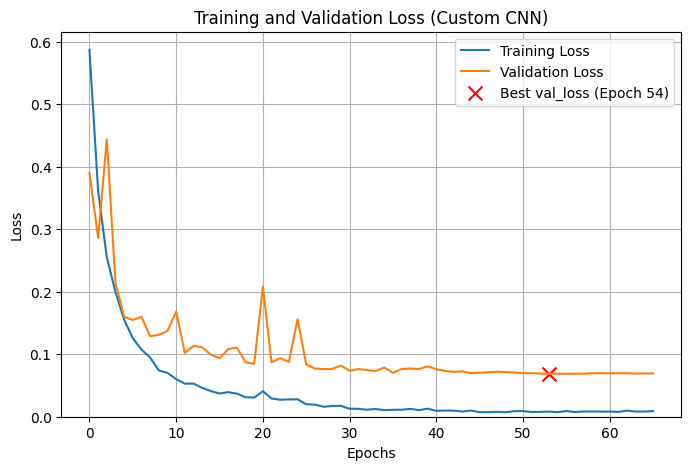

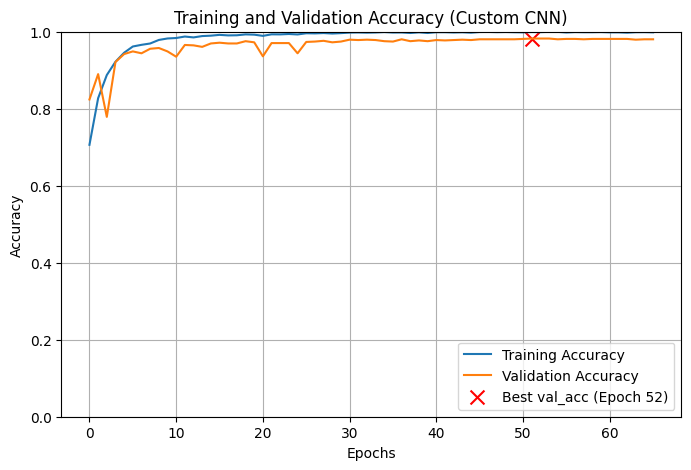


Evaluating on validation set for threshold selection...
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
Validation Predictions count: 1017, True labels count: 1017
Calculating Precision, Recall, F1, and Thresholds...

Best F1-score Threshold: 0.4997
  - F1-score: 0.9744
  - Precision at this threshold: 0.9817
  - Recall at this threshold: 0.9641

Suggested Threshold for Recall >= 0.88: 0.4997
  - Precision at this threshold: 0.9817
  - Actual Recall at this threshold: 0.9641
  - F1-score at this threshold: 0.9744

Chosen threshold for evaluation: 0.4997


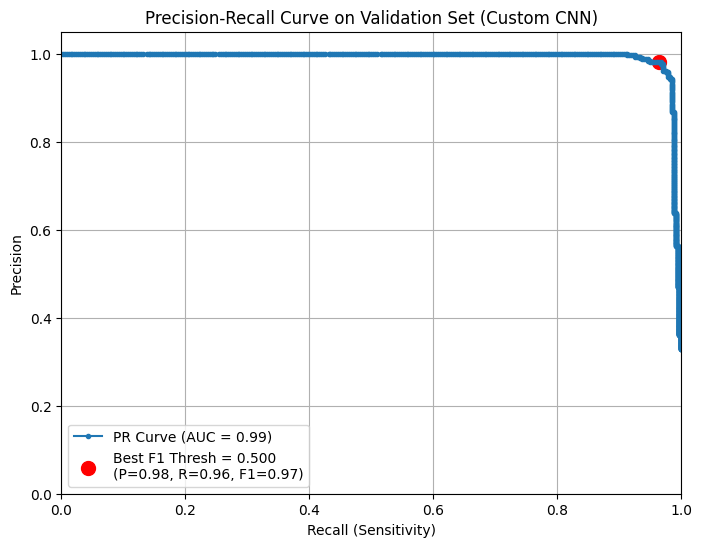


Classification Report (Validation - Adjusted Threshold):
               precision    recall  f1-score   support

No Stroke (0)       0.98      0.99      0.99       683
   Stroke (1)       0.98      0.96      0.97       334

     accuracy                           0.98      1017
    macro avg       0.98      0.98      0.98      1017
 weighted avg       0.98      0.98      0.98      1017



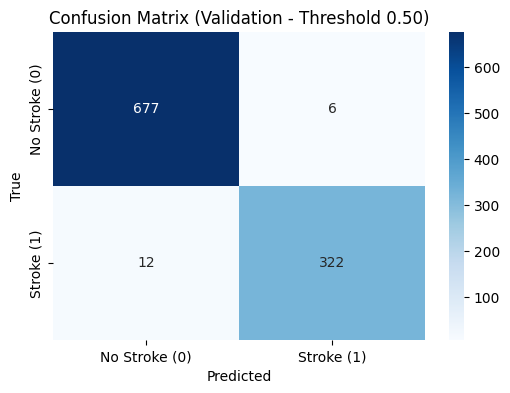


--- Test Set Evaluation ---
Loading test data...
Found 200 samples in test_data with valid labels.
Test label distribution:
 class
0    0.65
1    0.35
Name: proportion, dtype: float64
Predicting on test set...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
Test Predictions count: 200, True labels count: 200
Applying threshold: 0.4997

Classification Report on Test Set:
               precision    recall  f1-score   support

No Stroke (0)       0.92      1.00      0.96       130
   Stroke (1)       1.00      0.83      0.91        70

     accuracy                           0.94       200
    macro avg       0.96      0.91      0.93       200
 weighted avg       0.95      0.94      0.94       200



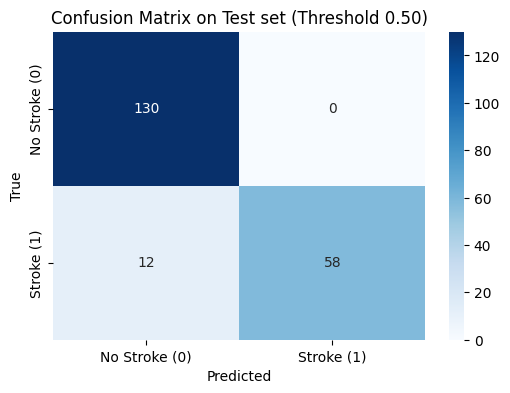


--- Script Finished ---


In [3]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# Keras layers for building the custom CNN
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    f1_score,
    classification_report,
    confusion_matrix)

# --- GPU Check ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU:", gpus)
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Memory growth enabled for GPUs.")
    except RuntimeError as e:
        print(f"RuntimeError configuring GPUs: {e}")
else:
    print("Cant find GPU, use CPU.")

# --- Data Loading ---
data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ'
try:
    hermorrhage_png = glob.glob(os.path.join(data_dir, 'Kanama/PNG/*.png'))
    ischemia_png = glob.glob(os.path.join(data_dir, 'İskemi/PNG/*.png'))
    no_stroke_png = glob.glob(os.path.join(data_dir, 'İnme Yok/*.png'))

    if not hermorrhage_png and not ischemia_png and not no_stroke_png:
        print(f"Warning: No PNG files found in the specified subdirectories of {data_dir}")
        # exit()

except FileNotFoundError:
    print(f"Error: Data directory not found at {data_dir}")
    exit()

images = []
labels = [] # Use integers: 0 for No Stroke, 1 for Stroke

for img_path in hermorrhage_png:
    images.append(img_path)
    labels.append(1)
for img_path in ischemia_png:
    images.append(img_path)
    labels.append(1)
for img_path in no_stroke_png:
    images.append(img_path)
    labels.append(0)

if not images:
     print("Error: No images were loaded. Check data paths and file types.")
     exit()

print(f"Count images: {len(images)}")
print(f"Count labels: {len(labels)}")
print(f"Label distribution: {np.bincount(labels)}")


# --- Constants ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 1 # Binary classification
EPOCHS = 100 # Early stopping will likely trigger before this

# --- DataFrame and Splitting ---
data_df = pd.DataFrame({
    'filename': images,
    'class': labels
})

train_df, val_df = train_test_split(
    data_df,
    test_size=0.15,
    stratify=data_df['class'],
    random_state=42
)

print(f"Training samples: {len(train_df)}, Validation samples: {len(val_df)}")
print("Training label distribution:\n", train_df['class'].value_counts(normalize=True))
print("Validation label distribution:\n", val_df['class'].value_counts(normalize=True))


# --- tf.data Pipeline ---

# MODIFIED: Removed EfficientNetV2 preprocessing
def parse_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE[0], IMG_SIZE[1]])
    # Convert to float32 and scale images to [0, 1] range
    image = tf.image.convert_image_dtype(image, tf.float32)
    # NO specific model preprocessing needed for custom CNN (unlike EfficientNet)
    return image

def configure_for_performance(ds, batch_size):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

# Dataset function for training (yields image, label)
def create_dataset_train(df, batch_size):
    list_ds = tf.data.Dataset.from_tensor_slices((df['filename'].values, df['class'].values))
    ds = list_ds.map(lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)),
                     num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds, batch_size)
    return ds

# Dataset function for validation/test (yields image, label)
def create_dataset_val_test(df, batch_size):
    list_ds = tf.data.Dataset.from_tensor_slices((df['filename'].values, df['class'].values))
    ds = list_ds.map(lambda filename, label: (parse_image(filename), tf.cast(label, tf.float32)),
                     num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.cache()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds


# --- Class Weights ---
class_weights_calc = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights_calc))
print("Using Class Weights:", class_weight_dict)

# --- Create Datasets ---
train_ds = create_dataset_train(train_df, BATCH_SIZE)
val_ds = create_dataset_val_test(val_df, BATCH_SIZE)

print("Train dataset element spec:", train_ds.element_spec)
print("Validation dataset element spec:", val_ds.element_spec)


# --- Model Definition (Custom CNN) ---
print("Building Custom CNN model...")

def build_custom_cnn(input_shape, num_classes):
    model = models.Sequential(name="Custom_CNN_StrokeClassifier")

    # Input Layer (implicitly defined by the first layer)
    # Use data augmentation layer if desired (optional, but recommended)
    # model.add(layers.RandomFlip("horizontal", input_shape=input_shape))
    # model.add(layers.RandomRotation(0.1))
    # model.add(layers.RandomZoom(0.1))

    # --- Convolutional Block 1 ---
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu')) # Or layers.ReLU()
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # --- Convolutional Block 2 ---
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # --- Convolutional Block 3 ---
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # --- Convolutional Block 4 (Optional) ---
    # model.add(layers.Conv2D(256, (3, 3), padding='same'))
    # model.add(layers.BatchNormalization())
    # model.add(layers.Activation('relu'))
    # model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # --- Classification Head ---
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5)) # Dropout for regularization
    model.add(layers.Dense(128))   # Dense layer
    model.add(layers.BatchNormalization()) # BN can also help in dense layers
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5)) # More dropout
    model.add(layers.Dense(num_classes, activation='sigmoid')) # Output layer

    return model

# Build the model
model = build_custom_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=NUM_CLASSES)
model.summary()

# --- Compile Model ---
print("Compiling model...")
# Use a potentially higher learning rate than for fine-tuning
initial_learning_rate = 1e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Model compiled.")

# --- Callbacks ---
# ReduceLROnPlateau is still useful when training from scratch
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Reduce LR more aggressively
    patience=5, # Increase patience slightly for scratch training
    verbose=1,
    min_lr=1e-7
)

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=12, # Maybe slightly more patience than fine-tuning
    verbose=1,
    restore_best_weights=True,
    min_delta=0.0001
)

callbacks_list = [lr_scheduler, early_stopper]

# --- Training ---
print("Starting training with class_weight argument...")
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=callbacks_list,
    class_weight=class_weight_dict
)
print("Training finished.")

# --- Save Model ---
model_save_path = '/kaggle/working/custom_cnn_stroke_classifier.keras' # Updated name
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# --- Evaluation and Plotting ---

# Plot Loss
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
actual_epochs = len(loss)
epochs_range = range(actual_epochs)

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
best_epoch_idx = np.argmin(val_loss)
plt.scatter(best_epoch_idx, val_loss[best_epoch_idx], s=100, c='red', marker='x', label=f'Best val_loss (Epoch {best_epoch_idx+1})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Custom CNN)') # Updated title
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

# Plot Accuracy
if 'accuracy' in history_dict and 'val_accuracy' in history_dict:
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    best_acc_epoch_idx = np.argmax(val_acc)
    plt.scatter(best_acc_epoch_idx, val_acc[best_acc_epoch_idx], s=100, c='red', marker='x', label=f'Best val_acc (Epoch {best_acc_epoch_idx+1})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy (Custom CNN)') # Updated title
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.ylim([0, 1.0]) # Accuracy is between 0 and 1
    plt.show()

# --- Threshold Calculation on Validation Set ---
print("\nEvaluating on validation set for threshold selection...")
val_ds_for_predict = create_dataset_val_test(val_df, BATCH_SIZE) # Recreate or reset if needed
y_pred_proba_val = model.predict(val_ds_for_predict)
y_true_val = val_df['class'].values

print(f"Validation Predictions count: {len(y_pred_proba_val)}, True labels count: {len(y_true_val)}")
if len(y_pred_proba_val) != len(y_true_val):
     print(f"Warning: Predictions count ({len(y_pred_proba_val)}) does not match true labels count ({len(y_true_val)}). Adjusting true labels.")
     y_true_val = y_true_val[:len(y_pred_proba_val)]

print("Calculating Precision, Recall, F1, and Thresholds...")
precision, recall, thresholds = precision_recall_curve(y_true_val, y_pred_proba_val)
f1_scores = np.array([
    2 * (p * r) / (p + r) if (p + r) > 0 else 0
    for p, r in zip(precision[:-1], recall[:-1])
])
valid_thresholds = thresholds[:len(f1_scores)]

if len(f1_scores) > 0:
    best_f1_idx = np.argmax(f1_scores)
    best_threshold_f1 = valid_thresholds[best_f1_idx]
    best_f1 = f1_scores[best_f1_idx]
    best_precision_f1 = precision[best_f1_idx + 1]
    best_recall_f1 = recall[best_f1_idx + 1]

    print(f"\nBest F1-score Threshold: {best_threshold_f1:.4f}")
    print(f"  - F1-score: {best_f1:.4f}")
    print(f"  - Precision at this threshold: {best_precision_f1:.4f}")
    print(f"  - Recall at this threshold: {best_recall_f1:.4f}")

    target_recall = 0.88 # Keep same target recall goal
    recall_indices = np.where(recall[:-1] >= target_recall)[0]
    chosen_threshold = best_threshold_f1

    if len(recall_indices) > 0:
        best_f1_for_recall_local_idx = np.argmax(f1_scores[recall_indices])
        best_threshold_recall_idx_global = recall_indices[best_f1_for_recall_local_idx]
        best_threshold_recall = valid_thresholds[best_threshold_recall_idx_global]
        best_precision_recall = precision[best_threshold_recall_idx_global + 1]
        actual_recall_recall = recall[best_threshold_recall_idx_global + 1]
        f1_recall = f1_scores[best_threshold_recall_idx_global]

        print(f"\nSuggested Threshold for Recall >= {target_recall}: {best_threshold_recall:.4f}")
        print(f"  - Precision at this threshold: {best_precision_recall:.4f}")
        print(f"  - Actual Recall at this threshold: {actual_recall_recall:.4f}")
        print(f"  - F1-score at this threshold: {f1_recall:.4f}")
        chosen_threshold = best_threshold_recall # Prioritize recall threshold if found
    else:
        print(f"\nNo threshold found for Recall >= {target_recall}. Using best F1 threshold.")
        chosen_threshold = best_threshold_f1
else:
    print("Warning: Could not calculate F1 scores. Using default threshold 0.5")
    chosen_threshold = 0.5
    best_f1_idx = -1

print(f"\nChosen threshold for evaluation: {chosen_threshold:.4f}")

# Plot PR Curve
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
if best_f1_idx != -1 and (best_f1_idx + 1) < len(recall):
    plt.scatter(recall[best_f1_idx + 1], precision[best_f1_idx + 1], marker='o', s=100, color='red', label=f'Best F1 Thresh = {best_threshold_f1:.3f}\n(P={best_precision_f1:.2f}, R={best_recall_f1:.2f}, F1={best_f1:.2f})')
if 'best_threshold_recall_idx_global' in locals() and best_threshold_recall_idx_global != best_f1_idx:
     plt.scatter(actual_recall_recall, best_precision_recall, marker='x', color='green', s=100, label=f'Target R ({target_recall}) Thresh = {best_threshold_recall:.3f}\n(P={best_precision_recall:.2f}, R={actual_recall_recall:.2f}, F1={f1_recall:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation Set (Custom CNN)') # Updated title
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.show()

# Evaluate Validation Set with Chosen Threshold
y_pred_val_adjusted = (y_pred_proba_val.flatten() > chosen_threshold).astype(int)
print("\nClassification Report (Validation - Adjusted Threshold):")
print(classification_report(y_true_val, y_pred_val_adjusted, target_names=['No Stroke (0)', 'Stroke (1)'], zero_division=0))

cm_val_adjusted = confusion_matrix(y_true_val, y_pred_val_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_adjusted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.title(f'Confusion Matrix (Validation - Threshold {chosen_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# --- Test Set Evaluation ---
print("\n--- Test Set Evaluation ---")
print("Loading test data...")
test_data_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/PNG/'
cevaplar_path = os.path.join('/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/YarısmaVeriSeti_1_Oturum/ASAMA1_Cevaplar.txt')

try:
    png_files = glob.glob(os.path.join(test_data_dir, '*.png'))
    if not png_files:
         print(f"Warning: No PNG files found in test directory {test_data_dir}")
except FileNotFoundError:
     print(f"Error: Test data directory not found at {test_data_dir}")
     png_files = []

labels_dict = {}
try:
    with open(cevaplar_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()[1:]
        for line in lines:
            parts = [part.strip() for part in line.strip().split('\t')]
            if len(parts) == 2 and parts[0] and parts[1]:
                image_id, label = parts
                if label in ['0', '1']:
                     labels_dict[f"{image_id}.png"] = int(label)
                else:
                     print(f"Warning: Invalid label '{label}' for image ID {image_id} in answer file. Skipping.")
except FileNotFoundError:
    print(f"Error: Answer file not found at {cevaplar_path}")
except Exception as e:
    print(f"Error reading answer file: {e}")

test_images = []
test_labels = []
for png_file in png_files:
    filename = os.path.basename(png_file)
    if filename in labels_dict:
        test_images.append(png_file)
        test_labels.append(labels_dict[filename])

if not test_images:
     print("Error: No matching test images found based on the answer key. Cannot evaluate test set.")
else:
    test_data = pd.DataFrame({'filename': test_images, 'class': test_labels})
    print(f"Found {len(test_data)} samples in test_data with valid labels.")
    print("Test label distribution:\n", test_data['class'].value_counts(normalize=True))

    # Create Test Dataset
    test_ds = create_dataset_val_test(test_data, BATCH_SIZE)

    # Predict on Test Set
    print("Predicting on test set...")
    y_pred_proba_test = model.predict(test_ds)
    y_true_test = test_data['class'].values

    print(f"Test Predictions count: {len(y_pred_proba_test)}, True labels count: {len(y_true_test)}")
    if len(y_pred_proba_test) != len(y_true_test):
         print(f"Warning: Test Predictions count ({len(y_pred_proba_test)}) does not match true labels count ({len(y_true_test)}). Adjusting true labels.")
         y_true_test = y_true_test[:len(y_pred_proba_test)]

    # Apply Chosen Threshold
    print(f"Applying threshold: {chosen_threshold:.4f}")
    y_pred_test = (y_pred_proba_test.flatten() > chosen_threshold).astype(int)

    # Evaluate Test Set
    print("\nClassification Report on Test Set:")
    print(classification_report(y_true_test, y_pred_test, target_names=['No Stroke (0)', 'Stroke (1)'], zero_division=0))

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Stroke (0)', 'Stroke (1)'],
                yticklabels=['No Stroke (0)', 'Stroke (1)'])
    plt.title(f'Confusion Matrix on Test set (Threshold {chosen_threshold:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

print("\n--- Script Finished ---")


--- Test Set Evaluation & Overlay Loading ---
Loading test data and finding overlays...
Found 200 samples in test_data with valid labels.
Found overlay files for 200 samples.
Test label distribution:
 class
0    0.65
1    0.35
Name: proportion, dtype: float64
Loading Model 1 (EfficientNetV2B0)...
Model 1 loaded successfully.
Loading Model 2 (Custom CNN)...
Model 2 loaded successfully.

Predicting with Model 1 (EfficientNetV2B0)...
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 759ms/step

Predicting with Model 2 (Custom CNN)...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step

EfficientNetV2B0 Accuracy (thresh 0.5000): 0.9400
Custom CNN Accuracy (thresh 0.5000): 0.9400

--- Displaying examples for EfficientNetV2B0 ---


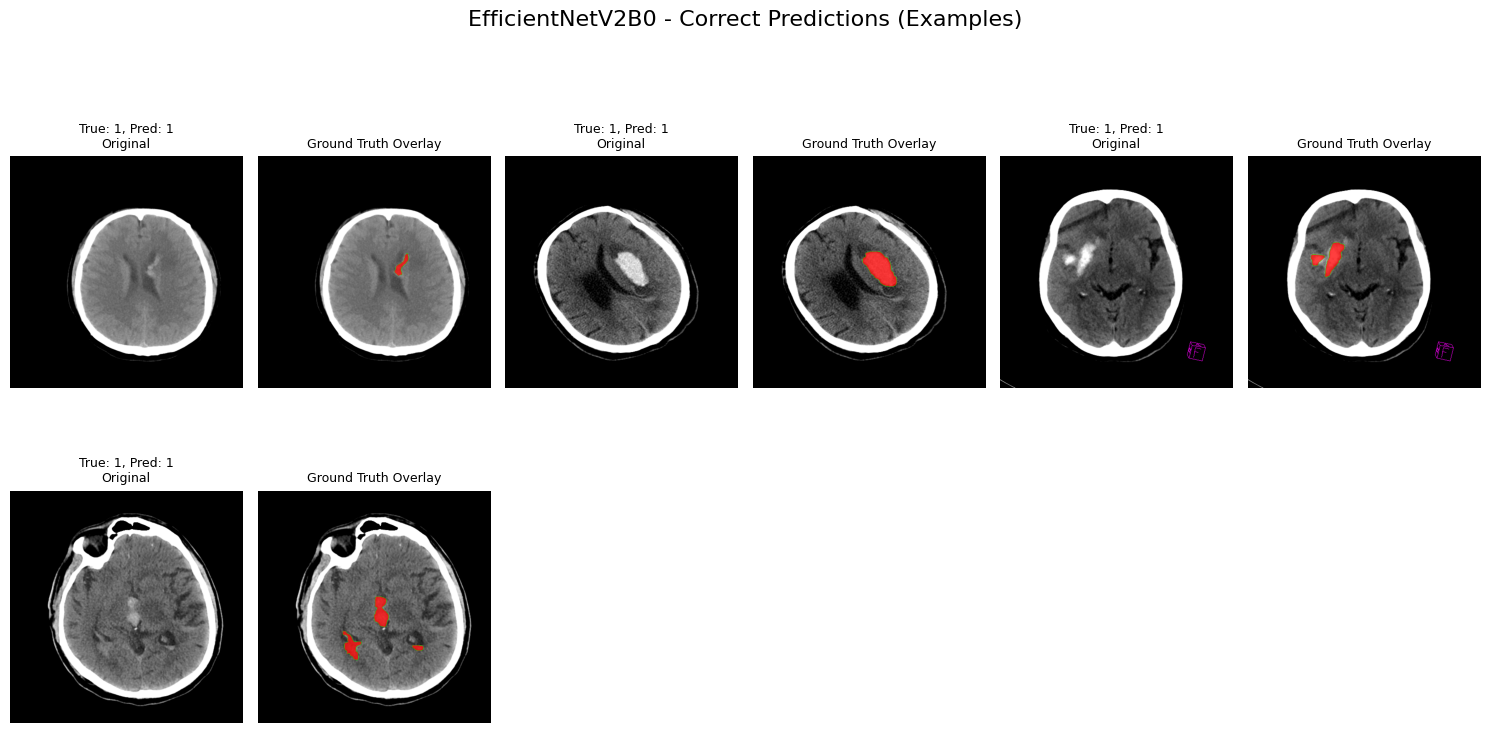

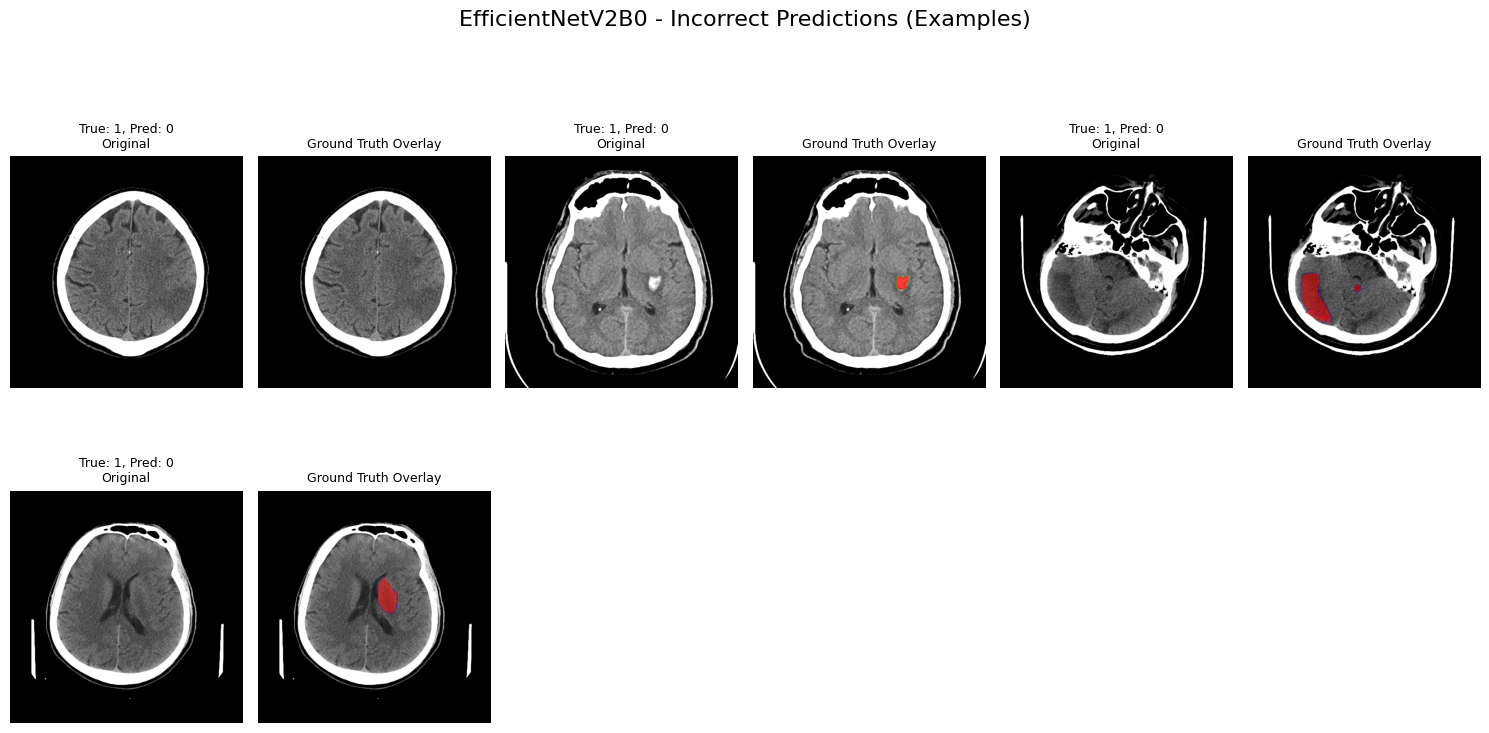


--- Displaying examples for Custom CNN ---


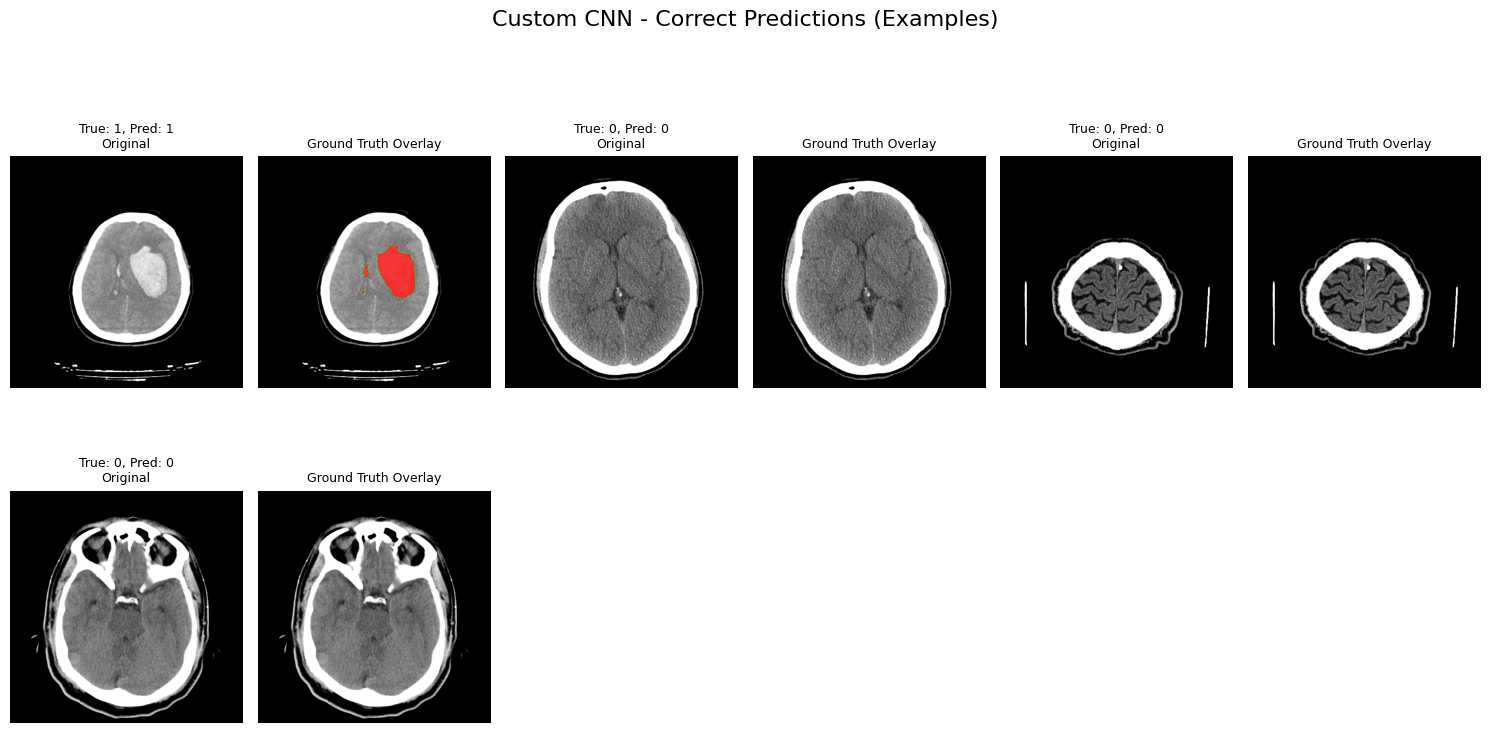

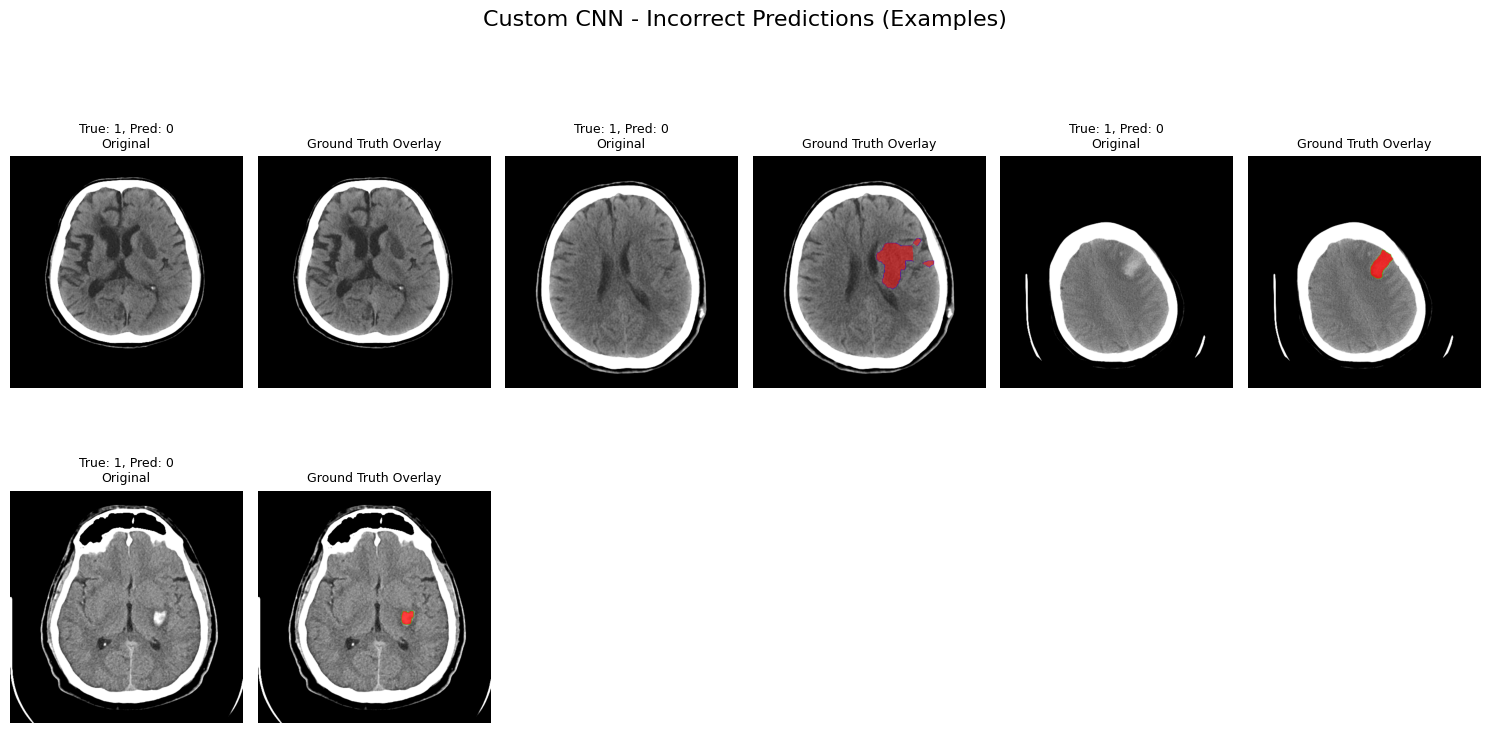


--- Visualization Finished ---


In [ ]:




# --- Test Set Evaluation (MODIFIED SECTION) ---
print("\n--- Test Set Evaluation & Overlay Loading ---")
print("Loading test data and finding overlays...")

# Define base paths using the structure from your image
base_input_dir = '/kaggle/input/inme-veri-seti-stroke-dataset/İNME VERİ SETİ/'
test_session_dir = os.path.join(base_input_dir, 'YarısmaVeriSeti_1_Oturum')
test_png_dir = os.path.join(test_session_dir, 'PNG')
test_overlay_dir = os.path.join(test_session_dir, 'OVERLAY') # Path to overlays
cevaplar_path = os.path.join(test_session_dir, 'ASAMA1_Cevaplar.txt')

# Find all PNG files in the test PNG directory
try:
    png_files = glob.glob(os.path.join(test_png_dir, '*.png'))
    if not png_files:
         print(f"Warning: No PNG files found in test directory {test_png_dir}")
except FileNotFoundError:
     print(f"Error: Test PNG directory not found at {test_png_dir}")
     png_files = []

# Load labels from the answer key
labels_dict = {}
try:
    with open(cevaplar_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()[1:]
        for line in lines:
            parts = [part.strip() for part in line.strip().split('\t')]
            if len(parts) == 2 and parts[0] and parts[1]:
                image_id, label = parts
                if label in ['0', '1']:
                     labels_dict[f"{image_id}.png"] = int(label)
                else:
                     print(f"Warning: Invalid label '{label}' for image ID {image_id} in answer file. Skipping.")
except FileNotFoundError:
    print(f"Error: Answer file not found at {cevaplar_path}")
except Exception as e:
    print(f"Error reading answer file: {e}")

# --- Create DataFrame with PNG and OVERLAY paths ---
test_images = []
test_labels = []
test_overlays = [] # List to store corresponding overlay paths

for png_file_path in png_files:
    filename = os.path.basename(png_file_path)
    if filename in labels_dict:
        # Construct the expected overlay file path
        overlay_file_path = os.path.join(test_overlay_dir, filename)

        test_images.append(png_file_path)
        test_labels.append(labels_dict[filename])

        # Check if the corresponding overlay file exists
        if os.path.exists(overlay_file_path):
            test_overlays.append(overlay_file_path)
        else:
            test_overlays.append(None) # Use None if overlay is missing
            print(f"Warning: Overlay file not found for {filename} at {overlay_file_path}")

if not test_images:
     print("Error: No matching test images found based on the answer key. Cannot evaluate test set.")
     # Exit or handle error
else:
    # Create the DataFrame including the overlay path
    test_data = pd.DataFrame({
        'filename': test_images,
        'class': test_labels,
        'overlay_filename': test_overlays # Add the new column
    })
    print(f"Found {len(test_data)} samples in test_data with valid labels.")
    print(f"Found overlay files for {test_data['overlay_filename'].notna().sum()} samples.")
    print("Test label distribution:\n", test_data['class'].value_counts(normalize=True))

    # --- Now `test_data` can be used for evaluation and visualization ---
    evaluation_df = test_data # Use this DataFrame for the rest of the script

# --- (Keep the model loading and prediction code from the previous step) ---

# --- Configuration (Copied from previous step for clarity) ---
NUM_EXAMPLES_TO_SHOW = 4 # How many correct/incorrect examples (pairs) to display
MODEL1_PATH = '/kaggle/working/efficientnetv2b0_stroke_classifier.keras'
MODEL2_PATH = '/kaggle/working/custom_cnn_stroke_classifier.keras'
MODEL1_NAME = 'EfficientNetV2B0'
MODEL2_NAME = 'Custom CNN'

# !! IMPORTANT: Set these thresholds
CHOSEN_THRESHOLD_MODEL1 = 0.5 # Replace with actual threshold for EfficientNetV2B0
CHOSEN_THRESHOLD_MODEL2 = 0.5 # Replace with actual threshold for Custom CNN

# --- Model Loading (Assume this runs) ---
print(f"Loading Model 1 ({MODEL1_NAME})...")
try:
    model1 = tf.keras.models.load_model(MODEL1_PATH)
    print("Model 1 loaded successfully.")
except Exception as e:
    print(f"Error loading Model 1 from {MODEL1_PATH}: {e}")
    model1 = None

print(f"Loading Model 2 ({MODEL2_NAME})...")
try:
    model2 = tf.keras.models.load_model(MODEL2_PATH)
    print("Model 2 loaded successfully.")
except Exception as e:
    print(f"Error loading Model 2 from {MODEL2_PATH}: {e}")
    model2 = None


# --- Get Predictions (Assume this runs using appropriate parse_image functions) ---
y_true = evaluation_df['class'].values
y_pred_proba1 = None
y_pred_proba2 = None
BATCH_SIZE = 32 # Or your chosen batch size

# Define parse functions if not already available globally in this cell
# def parse_image_efficientnetv2(filename): ...
# def parse_image_customcnn(filename): ...

def create_predict_dataset(df, batch_size, parse_fn):
    list_ds = tf.data.Dataset.from_tensor_slices(df['filename'].values)
    ds = list_ds.map(parse_fn, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

if model1:
    print(f"\nPredicting with Model 1 ({MODEL1_NAME})...")
    predict_ds1 = create_predict_dataset(evaluation_df, BATCH_SIZE, parse_image_efficientnetv2) # Make sure parse_image_efficientnetv2 is defined
    y_pred_proba1 = model1.predict(predict_ds1).flatten()

if model2:
    print(f"\nPredicting with Model 2 ({MODEL2_NAME})...")
    predict_ds2 = create_predict_dataset(evaluation_df, BATCH_SIZE, parse_image_customcnn) # Make sure parse_image_customcnn is defined
    y_pred_proba2 = model2.predict(predict_ds2).flatten()

# Adjust true labels length if predictions length differs (due to batch remainder drop)
y_true_adj1 = y_true[:len(y_pred_proba1)] if y_pred_proba1 is not None else y_true
y_true_adj2 = y_true[:len(y_pred_proba2)] if y_pred_proba2 is not None else y_true


# --- Identify Correct/Incorrect Predictions ---
results = {}
if y_pred_proba1 is not None:
    y_pred1 = (y_pred_proba1 > CHOSEN_THRESHOLD_MODEL1).astype(int)
    correct_mask1 = (y_pred1 == y_true_adj1)
    results[MODEL1_NAME] = {'y_pred': y_pred1, 'y_true': y_true_adj1,
                           'correct_indices': np.where(correct_mask1)[0],
                           'incorrect_indices': np.where(~correct_mask1)[0]}
    print(f"\n{MODEL1_NAME} Accuracy (thresh {CHOSEN_THRESHOLD_MODEL1:.4f}): {np.mean(correct_mask1):.4f}")
if y_pred_proba2 is not None:
    y_pred2 = (y_pred_proba2 > CHOSEN_THRESHOLD_MODEL2).astype(int)
    correct_mask2 = (y_pred2 == y_true_adj2)
    results[MODEL2_NAME] = {'y_pred': y_pred2, 'y_true': y_true_adj2,
                           'correct_indices': np.where(correct_mask2)[0],
                           'incorrect_indices': np.where(~correct_mask2)[0]}
    print(f"{MODEL2_NAME} Accuracy (thresh {CHOSEN_THRESHOLD_MODEL2:.4f}): {np.mean(correct_mask2):.4f}")


# --- Visualization Function (MODIFIED) ---
def load_display_image(filename):
    """Loads a single image file for display."""
    if filename is None or not os.path.exists(filename):
        return None # Handle missing files
    try:
        image = tf.io.read_file(filename)
        image = tf.image.decode_png(image, channels=3)
        return image.numpy()
    except Exception as e:
        print(f"Error loading display image {os.path.basename(filename)}: {e}")
        return None

def display_prediction_examples_with_overlay(df, indices, predictions, true_labels, title, num_to_show):
    """Displays original image and overlay side-by-side for prediction examples."""
    if len(indices) == 0:
        print(f"\nNo examples found for: {title}")
        return

    display_indices = random.sample(list(indices), min(len(indices), num_to_show))

    num_plot_cols = 6 # 3 pairs per row (Original, Overlay, Original, Overlay...)
    num_rows = (len(display_indices) + (num_plot_cols // 2) - 1) // (num_plot_cols // 2) # Calculate rows needed

    plt.figure(figsize=(15, 4 * num_rows)) # Adjust figsize as needed
    plt.suptitle(title, fontsize=16, y=1.0) # Adjust y for spacing

    for i, idx in enumerate(display_indices):
        # Get data for the i-th example to display
        row_data = df.iloc[idx]
        png_filename = row_data['filename']
        overlay_filename = row_data['overlay_filename'] # Get overlay path
        true_label = true_labels[idx]
        pred_label = predictions[idx]

        # Load images
        original_image = load_display_image(png_filename)
        overlay_image = load_display_image(overlay_filename) # Load overlay

        # Calculate subplot indices for the pair
        plot_index_orig = i * 2 + 1
        plot_index_overlay = i * 2 + 2

        # Plot Original Image
        plt.subplot(num_rows, num_plot_cols, plot_index_orig)
        if original_image is not None:
            plt.imshow(original_image)
            plt.title(f"True: {true_label}, Pred: {pred_label}\nOriginal", fontsize=9)
        else:
            plt.text(0.5, 0.5, 'Original\nNot Found', ha='center', va='center')
            plt.title(f"True: {true_label}, Pred: {pred_label}", fontsize=9)
        plt.axis('off')

        # Plot Overlay Image
        plt.subplot(num_rows, num_plot_cols, plot_index_overlay)
        if overlay_image is not None:
            plt.imshow(overlay_image)
            plt.title("Ground Truth Overlay", fontsize=9) # Overlay doesn't have pred label
        elif overlay_filename is not None : # Only show 'not found' if it was expected
             plt.text(0.5, 0.5, 'Overlay\nNot Found', ha='center', va='center')
             plt.title("Ground Truth Overlay", fontsize=9)
        else: # Overlay was None in the dataframe
             plt.text(0.5, 0.5, 'Overlay\nN/A', ha='center', va='center')
             plt.title("Ground Truth Overlay", fontsize=9)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.0, 1, 0.97]) # Adjust layout rect to prevent title overlap
    plt.show()


# --- Display Results (using the modified function) ---
if 'evaluation_df' in locals() and not evaluation_df.empty:
    for model_name, data in results.items():
        print(f"\n--- Displaying examples for {model_name} ---")

        # Display Correct Predictions
        display_prediction_examples_with_overlay(
            df=evaluation_df, # Pass the df with overlay paths
            indices=data['correct_indices'],
            predictions=data['y_pred'],
            true_labels=data['y_true'],
            title=f"{model_name} - Correct Predictions (Examples)",
            num_to_show=NUM_EXAMPLES_TO_SHOW
        )

        # Display Incorrect Predictions
        display_prediction_examples_with_overlay(
            df=evaluation_df, # Pass the df with overlay paths
            indices=data['incorrect_indices'],
            predictions=data['y_pred'],
            true_labels=data['y_true'],
            title=f"{model_name} - Incorrect Predictions (Examples)",
            num_to_show=NUM_EXAMPLES_TO_SHOW
        )
else:
    print("\nSkipping visualization as evaluation_df is not available.")

print("\n--- Visualization Finished ---")